<a href="https://colab.research.google.com/github/AngelikaBaloy/scratchpad/blob/main/ds3001_1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.20 class

In [5]:
! git clone https://github.com/AngelikaBaloy/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 30 (delta 4), reused 1 (delta 1), pack-reused 23 (from 1)
Receiving objects: 100% (30/30), 46.36 KiB | 3.57 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Download complete
Extracting data files...
Data extracted


In [7]:
import pandas as pd

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [9]:
df.dtypes

,0
Host Id,int64
Host Since,object
Name,object
Neighbourhood,object
Property Type,object
Review Scores Rating (bin),float64
Room Type,object
Zipcode,float64
Beds,float64
Number of Records,int64


In [8]:
df.shape

(30478, 13)

<Axes: >

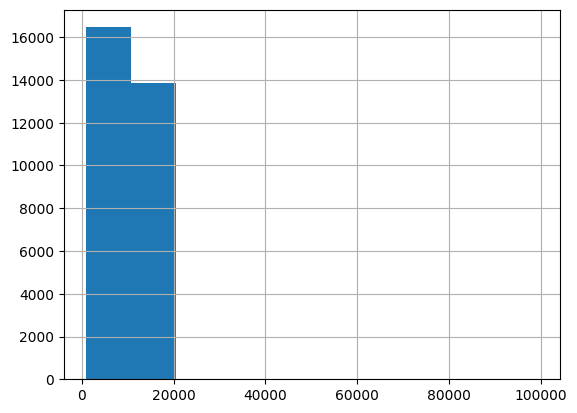

In [11]:
df['Zipcode'].hist()

In [12]:
df['Number Of Reviews'].describe()

,Number Of Reviews
count,30478.000000
mean,12.018735
std,21.980703
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,257.000000


In [13]:
df['Review Scores Rating (bin)'].describe()

,Review Scores Rating (bin)
count,22155.000000
mean,90.738659
std,9.059519
min,20.000000
25%,85.000000
50%,90.000000
75%,100.000000
max,100.000000


In [15]:
df['Review Scores Rating (bin)'].unique()

array([ nan,  95., 100.,  90.,  85.,  80.,  75.,  65.,  70.,  60.,  40.,
        50.,  20.,  55.,  45.,  30.])

In [16]:
df['Beds'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

<Axes: >

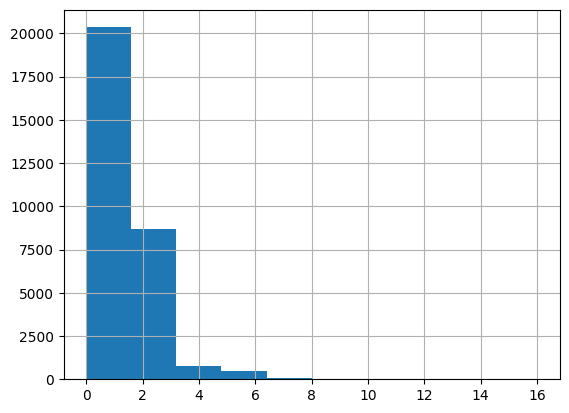

In [17]:
df['Beds'].hist()